# Show image and all 4 masks

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [ ]:
def display_image(folder_path):
    # Load the image
    img = Image.open(os.path.join(folder_path, 'rgb.jpg'))
    print(img.size)
    # Display the image
    plt.imshow(img)
    plt.show()

# Display the first N examples
dataset_path = "./dl_challenge"
subfolders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]
N = 2
for folder in subfolders[:N]:
    display_image(folder)

In [17]:
rgb_image_path = os.path.join(subfolders[0], 'rgb.jpg')
print(rgb_image_path)
cv2.imread(rgb_image_path).shape[:2]

./dl_challenge/859074c2-9915-11ee-9103-bbb8eae05561/rgb.jpg


(451, 706)

(9, 451, 706)


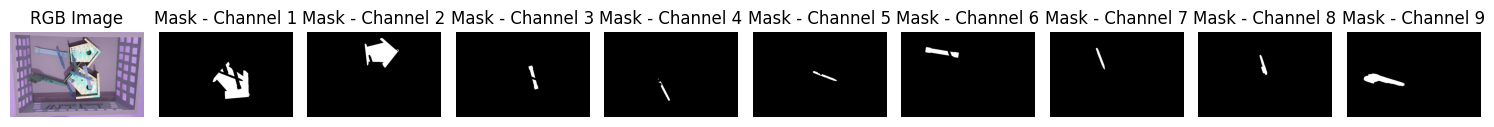

(8, 546, 702)


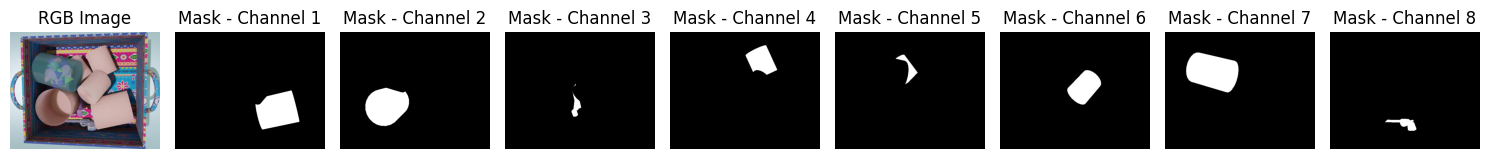

(9, 564, 893)


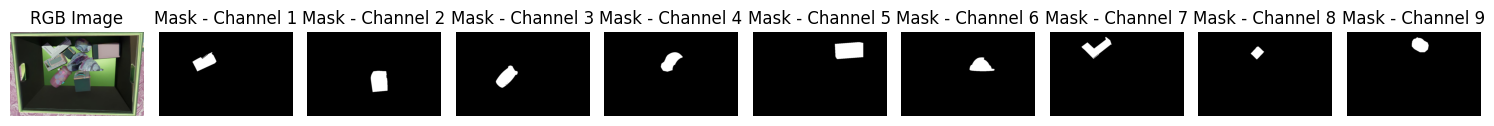

(8, 665, 773)


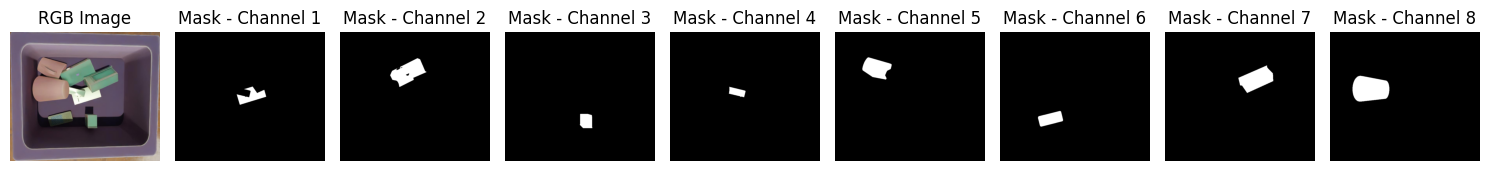

(7, 484, 725)


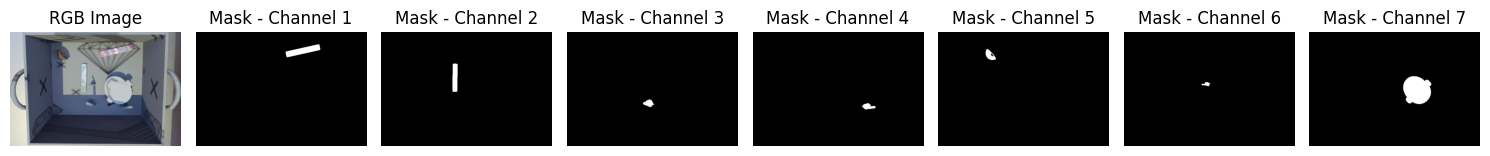

In [3]:
# Define the path to the dataset folder
dataset_path = "./dl_challenge"

# Function to load and display data from a specific folder
def display_example(folder_path):
    # Load files
    mask = np.load(os.path.join(folder_path, 'mask.npy'))
    print(f"{mask.shape}")
    n_objects = mask.shape[0]
    rgb_image = Image.open(os.path.join(folder_path, 'rgb.jpg'))

    # Visualize RGB image and mask channels
    fig, axes = plt.subplots(1, n_objects+1, figsize=(15, 5))
    
    # Show the RGB image
    axes[0].imshow(rgb_image)
    axes[0].set_title('RGB Image')
    axes[0].axis('off')
    
    # Show each channel of the mask
    for i in range(n_objects):
        axes[i + 1].imshow(mask[i], cmap='gray')
        axes[i + 1].set_title(f'Mask - Channel {i + 1}')
        axes[i + 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Get all subfolders in the dataset
subfolders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]

# Display the first N examples
N = 5
for folder in subfolders[:N]:
    display_example(folder)

# Show image and all 3 point cloud coordinate plots

In [11]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

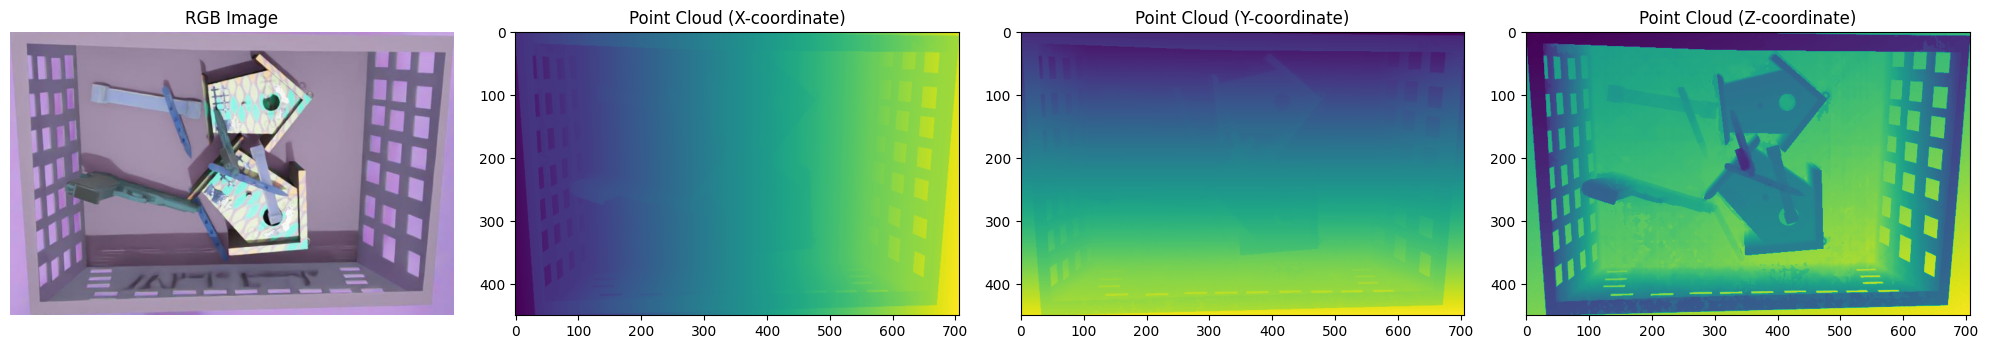

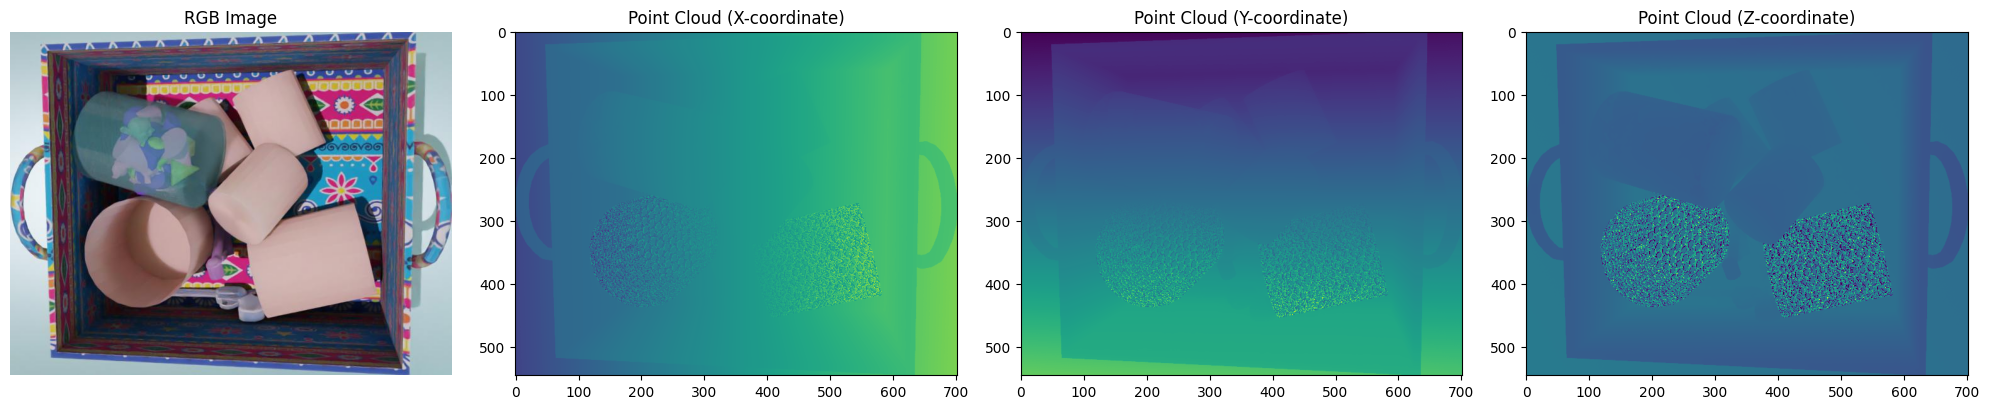

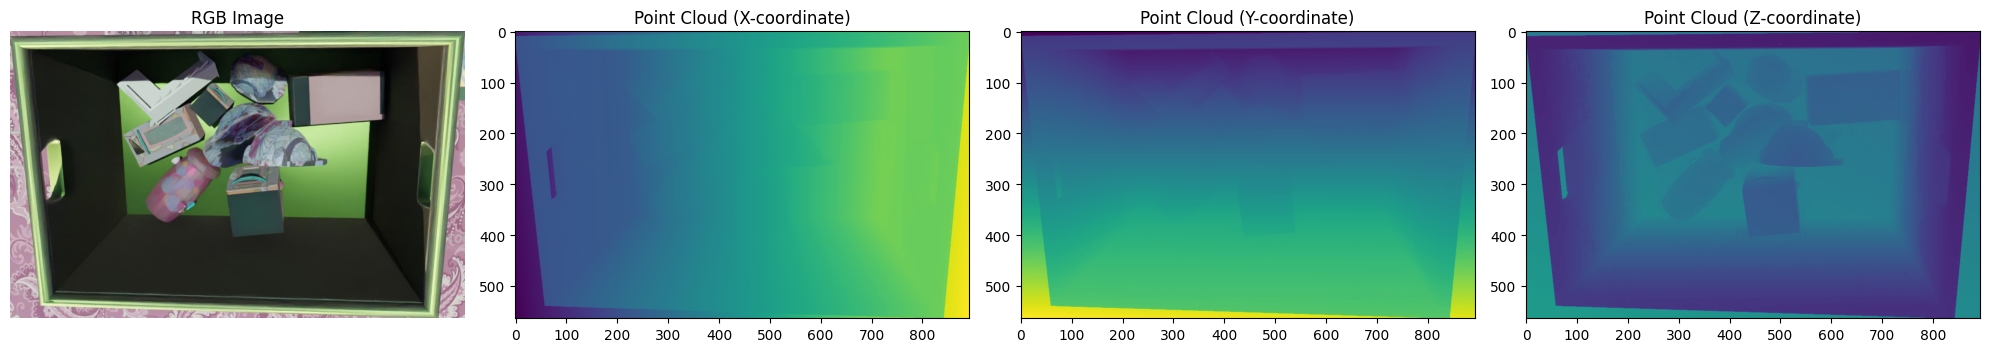

In [18]:
# Define the path to the dataset folder
dataset_path = "./dl_challenge"

# Function to load and display data from a specific folder
def display_example_with_pc(folder_path):
    # Load files
    mask = np.load(os.path.join(folder_path, 'mask.npy'))
    rgb_image = Image.open(os.path.join(folder_path, 'rgb.jpg'))
    pc_data = np.load(os.path.join(folder_path, 'pc.npy'))

    # Print the shape of the point cloud data to inspect it
    # print(f"Point cloud shape: {pc_data.shape}")
    
    # Reshape the point cloud data to have proper spatial dimensions
    if pc_data.shape[0] == 3:
        pc_x = pc_data[0, :, :]  # X coordinates
        pc_y = pc_data[1, :, :]  # Y coordinates
        pc_z = pc_data[2, :, :]  # Z coordinates
    else:
        print("Unexpected shape for point cloud. Please ensure it is 3xHxW (3 channels for X, Y, Z).")
        return

    # Visualize RGB image, and point cloud data (X, Y, Z coordinates)
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    # Show the RGB image
    axes[0].imshow(rgb_image)
    axes[0].set_title('RGB Image')
    axes[0].axis('off')
    
    # Show the point cloud X, Y, and Z coordinates as heatmaps
    titles = ['Point Cloud (X-coordinate)', 'Point Cloud (Y-coordinate)', 'Point Cloud (Z-coordinate)']
    pc_coords = [pc_x, pc_y, pc_z]
    
    for i in range(3):
        im = axes[i + 1].imshow(pc_coords[i], cmap='viridis')
        axes[i + 1].set_title(titles[i])
        # fig.colorbar(im, ax=axes[i + 1])
    
    plt.tight_layout()
    plt.show()

# Get all subfolders in the dataset
subfolders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]

# Display the first N examples
N = 3
for folder in subfolders[:N]:
    display_example_with_pc(folder)

# Show image and bounding box

Visualizing example 1: ./dl_challenge/859074c2-9915-11ee-9103-bbb8eae05561


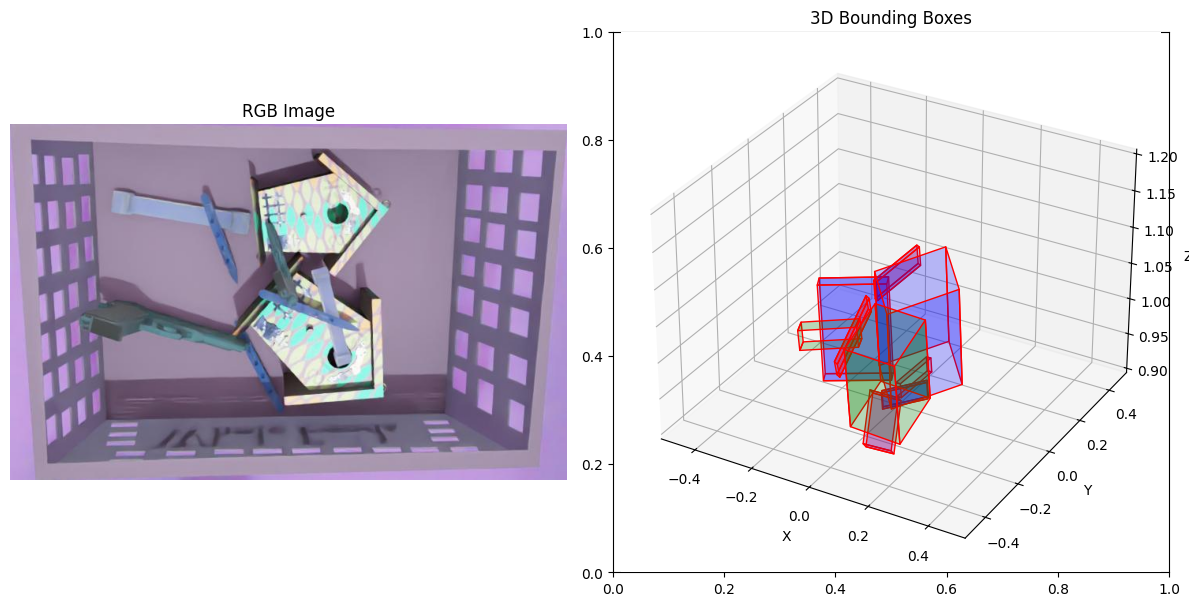

Visualizing example 2: ./dl_challenge/859074c3-9915-11ee-9103-bbb8eae05561


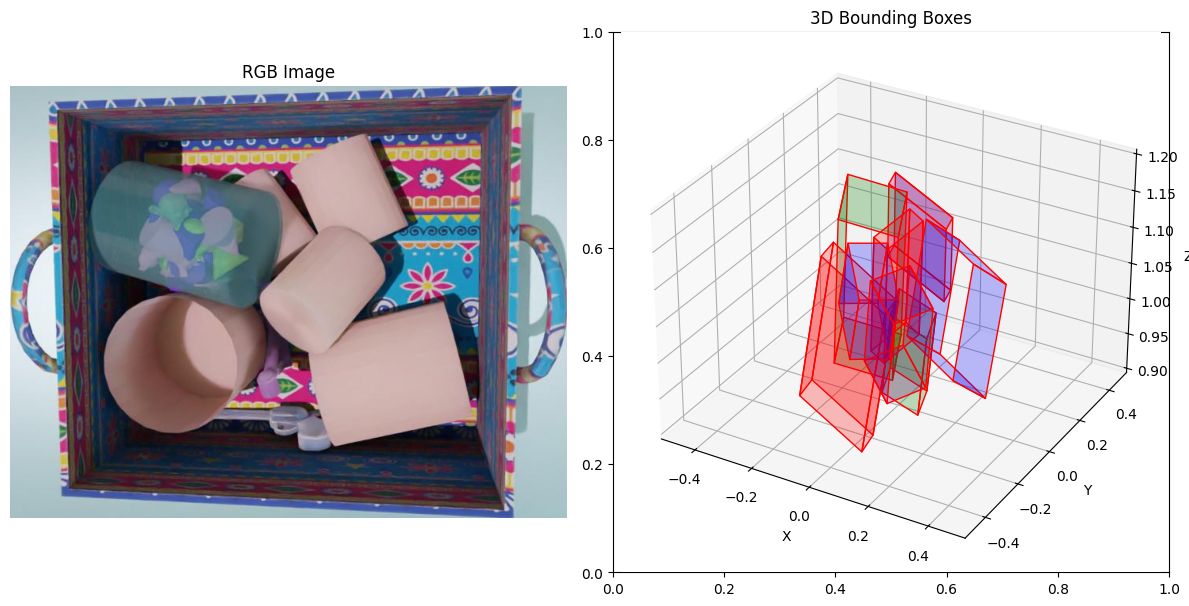

Visualizing example 3: ./dl_challenge/859074c4-9915-11ee-9103-bbb8eae05561


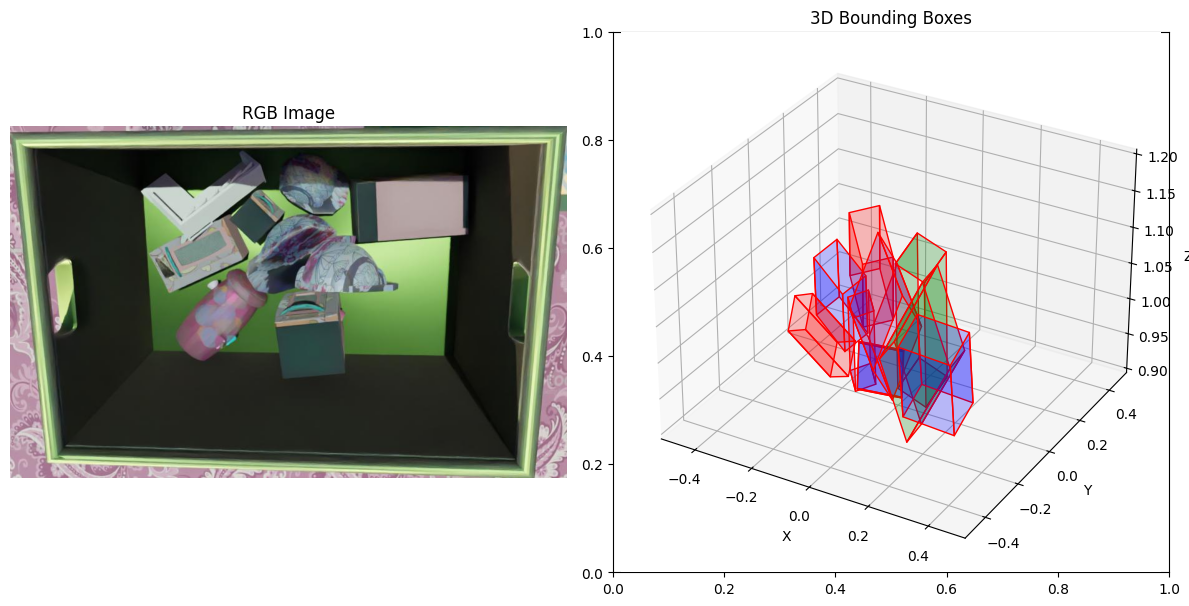

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from PIL import Image

# Function to draw the 3D bounding box
def draw_bbox(ax, bbox, color='blue'):
    # Define the vertices of the bounding box
    verts = [[bbox[0], bbox[1], bbox[2], bbox[3]],
             [bbox[4], bbox[5], bbox[6], bbox[7]],
             [bbox[0], bbox[3], bbox[7], bbox[4]],
             [bbox[1], bbox[2], bbox[6], bbox[5]]]
    
    # Create a 3D polygon from the vertices and add it to the plot
    ax.add_collection3d(Poly3DCollection(verts, facecolors=color, linewidths=1, edgecolors='r', alpha=.25))

# Function to plot the RGB image and 3D bounding boxes for each example
def plot_example(example_path):
    # Load the rgb.jpg file
    rgb_path = os.path.join(example_path, 'rgb.jpg')
    rgb_image = Image.open(rgb_path)
    
    # Load the bbox3d.npy file
    bbox3d_path = os.path.join(example_path, 'bbox3d.npy')
    bbox3d_data = np.load(bbox3d_path)
    
    # Create a 1x2 subplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Show the RGB image in the first subplot
    axes[0].imshow(rgb_image)
    axes[0].axis('off')  # Hide the axis for the image
    axes[0].set_title('RGB Image')
    
    # Plot the 3D bounding boxes in the second subplot
    ax = fig.add_subplot(122, projection='3d')
    colors = ['blue', 'green', 'red', 'purple']
    for i, bbox in enumerate(bbox3d_data):
        draw_bbox(ax, bbox, color=colors[i % len(colors)])
    
    # Set axis labels and limits for the 3D plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-0.5, 0.5])
    ax.set_ylim([-0.5, 0.5])
    ax.set_zlim([0.9, 1.2])
    ax.set_title('3D Bounding Boxes')
    
    plt.tight_layout()
    plt.show()

# Path to the dataset folder
dataset_path = './dl_challenge'

# Get the list of example folders
example_folders = [os.path.join(dataset_path, folder) for folder in os.listdir(dataset_path)]

# Number of examples to visualize
N = 3

# Loop through the first N examples and plot them
for i in range(N):
    example_path = example_folders[i]
    print(f"Visualizing example {i+1}: {example_path}")
    plot_example(example_path)
